In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import globals as gl
from force import load_mov
from matplotlib import colormaps as colormaps
import matplotlib.cm as cm
from util import lowpass_butter, lowpass_fir
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

plt.style.use('default')

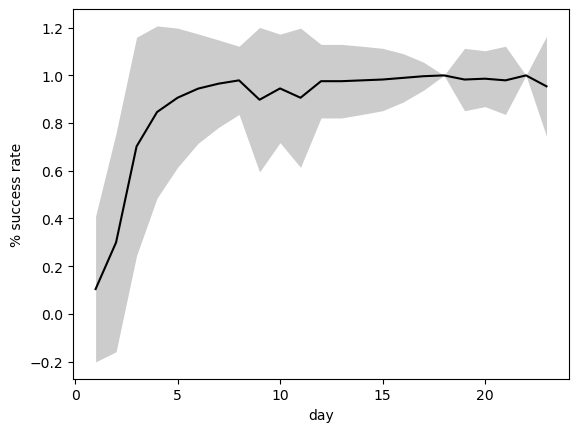

In [152]:
until_day = 23
days = np.arange(1, until_day + 1, 1)
sn = 104
experiment = 'efc4'

dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir, 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

sns.lineplot(x='day', y='trialPoint', data=dat, errorbar='sd', err_kws={'linewidth': 0}, color='k')

plt.ylabel('% success rate')
plt.show()

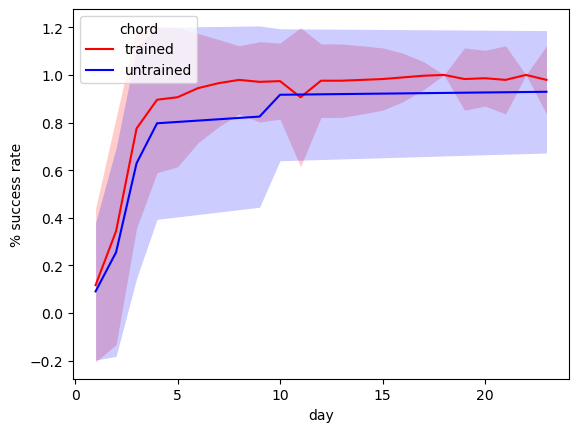

In [153]:
dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir,  'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

dat['chordID'] = dat['chordID'].astype(str)
sns.lineplot(x='day', y='trialPoint', hue='chord', data=dat, errorbar='sd', err_kws={'linewidth': 0}, palette=['red', 'blue'],hue_order=['trained', 'untrained'])

plt.ylabel('% success rate')
plt.show()

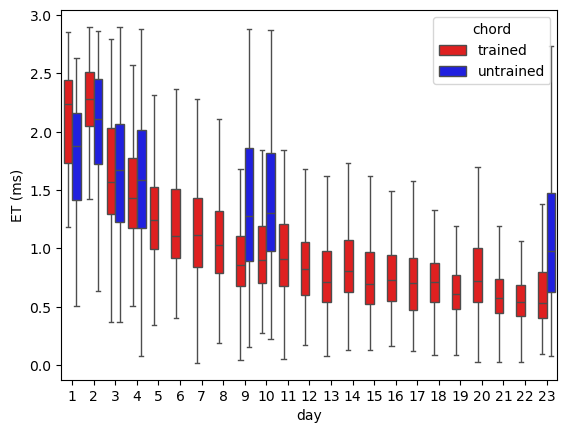

In [154]:
dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir, 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat_tmp = dat_tmp[dat_tmp['trialPoint']==1]
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

sns.boxplot(x='day', y='ET', data=dat, hue='chord', palette=['red', 'blue'],showfliers=False,hue_order=['trained', 'untrained'])

plt.ylabel('ET (ms)')
plt.show()

/tmp/ipykernel_244868/628306472.py:15: UserWarning: 
The palette list has fewer values (1) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dat[dat['chord'] == 'trained'], ax=axs, x='offset', y='ET', hue='day', errorbar='se', lw=3,
/tmp/ipykernel_244868/628306472.py:17: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dat[dat['chord'] == 'untrained'], ax=axs, x='offset', y='ET', hue='day', errorbar='se', lw=3,


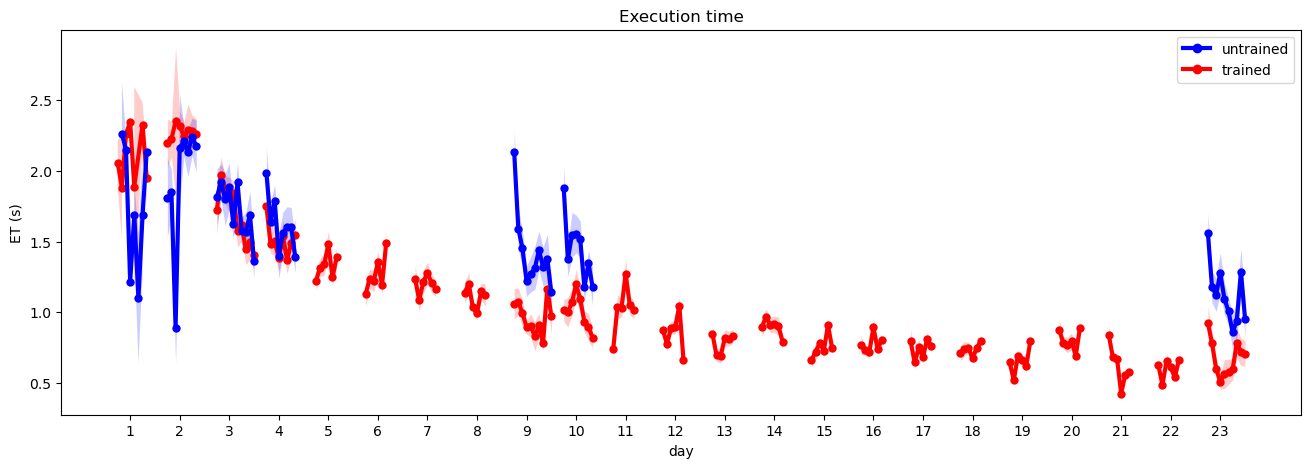

In [155]:
dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir,  'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat_tmp['day'] = day  # <--- Add day column
    dat_tmp = dat_tmp[dat_tmp['trialPoint']==1]
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

# Create offset
offset = 12
dat['offset'] = dat['BN'] + dat['day'] * offset

# Plot
fig, axs = plt.subplots(figsize=(16, 5))
sns.lineplot(data=dat[dat['chord'] == 'trained'], ax=axs, x='offset', y='ET', hue='day', errorbar='se', lw=3,
             palette=['red'], marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
sns.lineplot(data=dat[dat['chord'] == 'untrained'], ax=axs, x='offset', y='ET', hue='day', errorbar='se', lw=3,
             palette=['blue'], marker='o', markeredgewidth=0, err_kws={'linewidth': 0})

xticks = [(day * offset) + (offset / 2) - 2 for day in range(1, until_day + 1)]
axs.set_xticks(xticks)
axs.set_xticklabels(np.linspace(1, until_day, until_day, dtype=int))
axs.set_title('Execution time')
axs.set_ylabel('ET (s)')
axs.set_xlabel('day')

# Custom legend
custom_handles = [
    Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', label='untrained', lw=3),
    Line2D([0], [0], marker='o', color='red', markerfacecolor='red', label='trained', lw=3)
]
axs.legend(handles=custom_handles, loc='upper right', ncol=1)

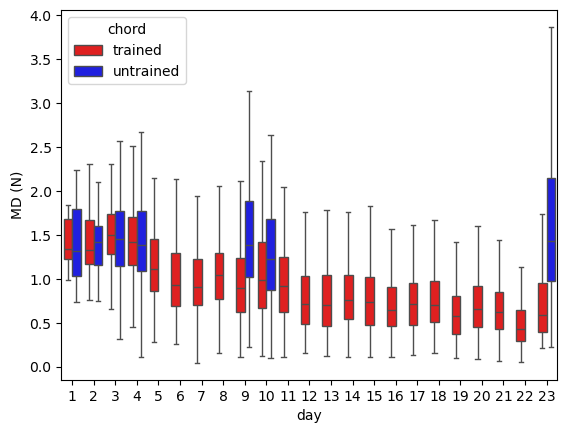

In [156]:
dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir,  'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat_tmp = dat_tmp[dat_tmp['trialPoint']==1]
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

sns.boxplot(x='day', y='MD', data=dat, hue='chord',showfliers=False, palette=['red', 'blue'],hue_order=['trained', 'untrained'])

plt.ylabel('MD (N)')
plt.show()

/tmp/ipykernel_244868/645914380.py:15: UserWarning: 
The palette list has fewer values (1) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dat[dat['chord'] == 'trained'], ax=axs, x='offset', y='MD', hue='day', errorbar='se', lw=3,
/tmp/ipykernel_244868/645914380.py:17: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=dat[dat['chord'] == 'untrained'], ax=axs, x='offset', y='MD', hue='day', errorbar='se', lw=3,


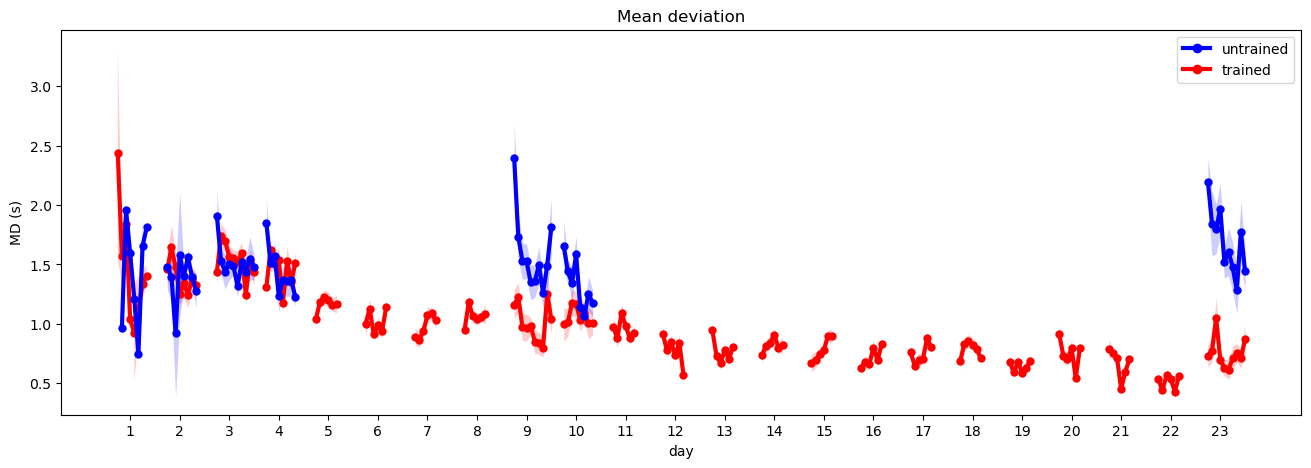

In [157]:
dat = pd.DataFrame()
for day in days:
    path = os.path.join(gl.baseDir,  'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat_tmp = pd.read_csv(path, sep='\t')
    dat_tmp['day'] = day  # <--- Add day column
    dat_tmp = dat_tmp[dat_tmp['trialPoint']==1]
    dat = pd.concat([dat, dat_tmp], ignore_index=True)

# Create offset
offset = 12
dat['offset'] = dat['BN'] + dat['day'] * offset

# Plot
fig, axs = plt.subplots(figsize=(16, 5))
sns.lineplot(data=dat[dat['chord'] == 'trained'], ax=axs, x='offset', y='MD', hue='day', errorbar='se', lw=3,
             palette=['red'], marker='o', markeredgewidth=0, err_kws={'linewidth': 0})
sns.lineplot(data=dat[dat['chord'] == 'untrained'], ax=axs, x='offset', y='MD', hue='day', errorbar='se', lw=3,
             palette=['blue'], marker='o', markeredgewidth=0, err_kws={'linewidth': 0})

xticks = [(day * offset) + (offset / 2) - 2 for day in range(1, until_day + 1)]
axs.set_xticks(xticks)
axs.set_xticklabels(np.linspace(1, until_day, until_day, dtype=int))
axs.set_title('Mean deviation')
axs.set_ylabel('MD (s)')
axs.set_xlabel('day')

# Custom legend
custom_handles = [
    Line2D([0], [0], marker='o', color='blue', markerfacecolor='blue', label='untrained', lw=3),
    Line2D([0], [0], marker='o', color='red', markerfacecolor='red', label='trained', lw=3)
]
axs.legend(handles=custom_handles, loc='upper right', ncol=1)

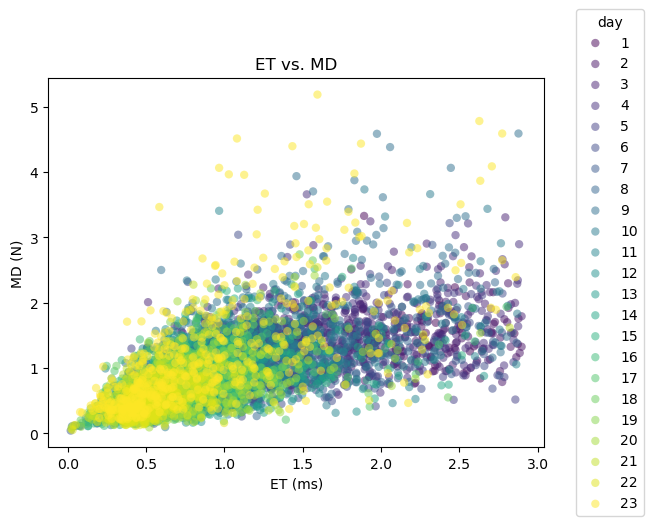

In [158]:
cmap=colormaps['viridis']
cindx = np.linspace(0, cmap.N - 1, len(days), dtype=int)
for day in days:
    path = os.path.join(gl.baseDir, 'behavioural', f'day{day}', f'efc4_{sn}_single_trial.tsv')
    dat = pd.read_csv(path, sep='\t')
    dat = dat[dat['trialPoint']==1]

    plt.scatter(dat['ET'], dat['MD'], alpha=.5, edgecolors='none', color=cmap.colors[cindx[day - 1]], label=day)

plt.xlabel('ET (ms)')
plt.ylabel('MD (N)')
plt.title('ET vs. MD')
plt.legend(bbox_to_anchor=(1.05, .5), loc='center left', title='day')

plt.show()


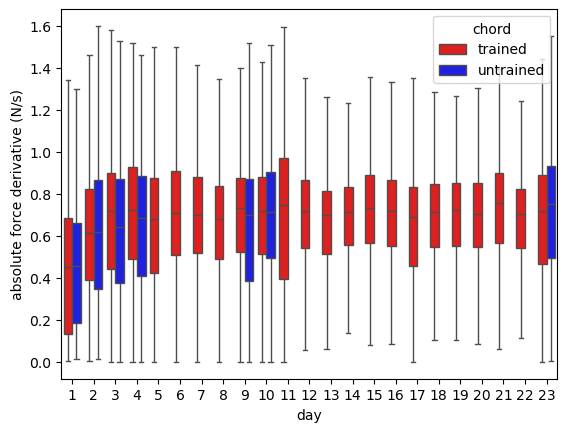

In [159]:
dat = pd.DataFrame()
for d, day in enumerate(days):
    dat_tmp = pd.read_csv(os.path.join(gl.baseDir, 'behavioural', f'day{day}', f'{experiment}_{sn}_single_trial.tsv'), sep='\t')
    dat_tmp = dat_tmp[dat_tmp['trialPoint']==1]
    dat_tmp['day'] = day
    dat_tmp_melt = dat_tmp.melt(id_vars=['chordID', 'chord', 'TN', 'BN', 'day'],value_vars=['thumb_der', 'index_der', 'middle_der', 'ring_der', 'pinkie_der'], var_name='finger', value_name='force_der')
    dat = pd.concat([dat, dat_tmp_melt], ignore_index=True)

sns.boxplot(x='day', y='force_der', data=dat, hue='chord',showfliers=False, palette=['red', 'blue'],hue_order=['trained', 'untrained'])

plt.ylabel('absolute force derivative (N/s)')
plt.show()

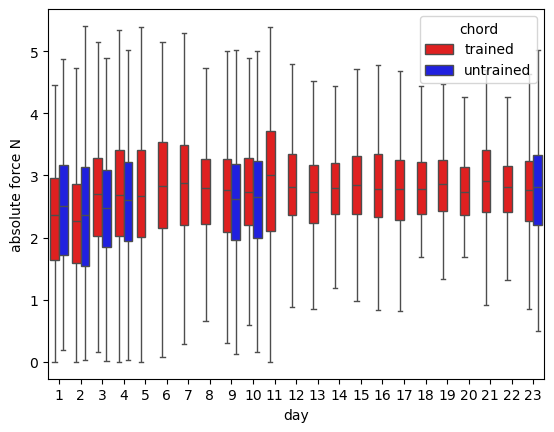

In [160]:
dat = pd.DataFrame()
for d, day in enumerate(days):
    dat_tmp = pd.read_csv(os.path.join(gl.baseDir,  'behavioural', f'day{day}', f'{experiment}_{sn}_single_trial.tsv'), sep='\t')
    dat_tmp = dat_tmp[dat_tmp['trialPoint']==1]
    dat_tmp[['thumb', 'index', 'middle', 'ring', 'pinkie']] = dat_tmp[['thumb', 'index', 'middle', 'ring', 'pinkie']].abs()
    dat_tmp['day'] = day
    dat_tmp_melt = dat_tmp.melt(id_vars=['chordID', 'chord', 'TN', 'BN', 'day'],value_vars=['thumb', 'index', 'middle', 'ring', 'pinkie'], var_name='finger', value_name='force_der')
    dat = pd.concat([dat, dat_tmp_melt], ignore_index=True)

sns.boxplot(x='day', y='force_der', data=dat, hue='chord',showfliers=False, palette=['red', 'blue'],hue_order=['trained', 'untrained'])

plt.ylabel('absolute force N')
plt.show()

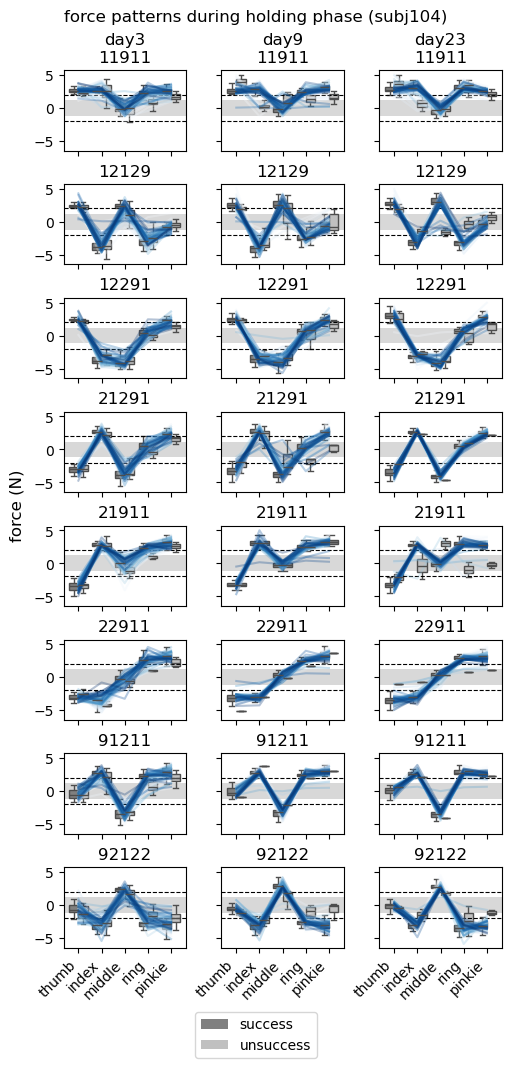

In [161]:
days = [3, 9, 23]

fig, axs = plt.subplots(8, len(days), figsize=(5, 10), sharey=True, sharex=True ,constrained_layout=True)

for d, day in enumerate(days):
    dat = pd.read_csv(os.path.join(gl.baseDir,  'behavioural', f'day{day}', f'{experiment}_{sn}_single_trial.tsv'), sep='\t')
    dat['trialPoint'] = dat['trialPoint'].map(gl.trialPoint_mapping)

    for ch, chordID in enumerate(dat.chordID.astype(int).sort_values().unique()):
        dat_tmp = dat[dat['chordID'] == chordID]
        dat_tmp_melt = dat_tmp.melt(id_vars=['chordID', 'trialPoint'],
                                    value_vars=['thumb', 'index', 'middle', 'ring', 'pinkie'],
                                    var_name='finger', value_name='force')
        force = dat_tmp[['thumb', 'index', 'middle', 'ring', 'pinkie']].to_numpy()

        colors = cm.Blues(np.linspace(0, 1, force.shape[0]))

        sns.boxplot(data=dat_tmp_melt, ax=axs[ch, d], x='finger', hue='trialPoint', y='force', showfliers=False, legend=False, palette=['grey', 'silver'], hue_order=['success', 'unsuccess'])

        axs[ch, d].axhspan(-gl.fthresh, gl.fthresh, color='gray', alpha=0.3, lw=0)
        axs[ch, d].axhline(gl.ftarget, color='k', lw=.8, ls='--')
        axs[ch, d].axhline(-gl.ftarget, color='k', lw=.8, ls='--')

        for f, c in zip(force, colors):
            axs[ch, d].plot(f, color=c, alpha=.3)

        if ch == 0:
            axs[ch, d].set_title(f'day{day}\n{chordID}')

        else:
            axs[ch, d].set_title(f'{chordID}')

        axs[ch, d].set_ylabel('')

legend_handles = [
    Patch(facecolor='grey', label='success'),
    Patch(facecolor='silver', label='unsuccess'),
]

fig.legend(handles=legend_handles, bbox_to_anchor=(.5, 0), loc='upper center')

for ax in axs[-1]:
    ax.set_xlabel('')
    ax.set_xticks(ax.get_xticks(), rotation=45, labels=ax.get_xticklabels(), ha='right')

fig.supylabel('force (N)')
fig.suptitle(f'force patterns during holding phase (subj{sn})')

plt.show()